# HOUSE PRICES PREDICTION USING MACHINE LEARNING

# INTRODUCTION:




IN THIS PROJECT I IMPLEMENTED A LINEAR REGRESSION MODEL TO PREDICT HOUSES PRICES BASED 
ON VARIOUS FEATURES SUCH AS THE NUMBER OF BEDROOMS, SQUARE FOOTAGE, LOCATION, AND OTHER FACTORS.

THE GOAL WAS TO DEVELOP A MODEL THAT ACCURATELY ASTIMATES THE PROPERTY VALUES BASED ON HISTORICAL DATA.
THROUGH DATA PREPROCESSING, FEATURE SELECTION, AND TRAINING THE LINEAR REGRESSION MODEL, I WAS ABLE TO ACHIEVE
MEANINGFUL INSIGHTS ON HOW DIFFERENT VARIABLES AFFECT HOUSE PRICES.

THIS PROJECT HIGHLIGHT MY ABILITY TO WORK WITH REGRESSION MODELS, HANDLE REAL-WORLD DATASETS AND EVALUATE PERFOMANCE 
EFFECTIVELY.



### Language, Tools, & Frameworks i Used For The Project:
    
1. Python.
2. Pandas.
3. Numpy.
4. Matplotlib.
5. Scikit-learn.
6. Github.        

1. IMPORTING RELEVENT LIBRARIES

In [174]:
#IMPORT LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# IGNORE WARNINGS
warnings.filterwarnings("ignore")

2. DATA PREPARATION

In [158]:
#READ (LOAD) THE DATASET
Data = pd.read_csv("HOUSE PRICES DATA.csv")

In [159]:
#DISPLAYING FIRST 5 ROWS OF THE DATASET
print(Data.head(5))

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [160]:
#DISPLAYING LAST 5 ROWS OF THE DATASET
print(Data.tail(5))

                     date          price  bedrooms  bathrooms  sqft_living  \
4595  2014-07-09 00:00:00  308166.666667       3.0       1.75         1510   
4596  2014-07-09 00:00:00  534333.333333       3.0       2.50         1460   
4597  2014-07-09 00:00:00  416904.166667       3.0       2.50         3010   
4598  2014-07-10 00:00:00  203400.000000       4.0       2.00         2090   
4599  2014-07-10 00:00:00  220600.000000       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated             street       city  \
4595              0      1954          1979     501

In [161]:
#DISPLAYING THE SUMMARY STATISTICS
print(Data.describe())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

In [162]:
Data.count()

date             4600
price            4600
bedrooms         4600
bathrooms        4600
sqft_living      4600
sqft_lot         4600
floors           4600
waterfront       4600
view             4600
condition        4600
sqft_above       4600
sqft_basement    4600
yr_built         4600
yr_renovated     4600
street           4600
city             4600
statezip         4600
country          4600
dtype: int64

In [163]:
Data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [170]:
#DEALING WITH NUMERICAL COLUMNS

#converting NUMERICAL columns to CATEGORICAL using label encoder
label_encoder = LabelEncoder()
numerical_cols = Data.select_dtypes(include=['object']).columns.tolist()

for num in numerical_cols:
    Data[f"[num]_encoded"] = label_encoder.fit_transform(Data[num])
    
#DROPPING THE ORIGINAL NUMERICAL COLUMNS
Data.drop(numerical_cols, axis=1, inplace=True)

Data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,[num]_encoded
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,0


# MACHINE LEARNING MODEL BUILDING

In [165]:
#DEFINE FEATURES (X) AND TARGET(Y)
X = Data[['sqft_living', 'sqft_lot','sqft_basement', 'bedrooms', 'bathrooms']]
y = Data['price']

3. FEATURE SCALING

In [166]:
#INITIALIZE THE SCALER
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4. TRAINING AND TESTING THE MACHINE LEARNING MODEL

In [146]:
#SPLIT THE DATA INTO TRAINING AND TESTING SETS (80% TRAIN, 20% TEST)
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)

In [168]:
#CREATE A LINEAR REGRESSION MODEL
model = LinearRegression()

#TRAIN THE MODEL USING THE TRAINING DATA
model.fit(X_train,y_train)

#MAKE PREDICTIONS ON THE TEST DATA
y_pred = model.predict(X_test)

#EVALUATE THE MODEL
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#PRINT MODEL PERFORMANCE
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) score: {r2}')

#PRINT THE MODEL'S COEFFICIENTS
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Mean Squared Error (MSE): 989968234326.6798
R-squared (R2) score: 0.029296674004563705
Intercept: 125708.70017051935
Coefficients: [ 3.01866139e+02 -5.74495670e-01  4.14772365e+01 -6.58589933e+04
 -3.32463961e+03]


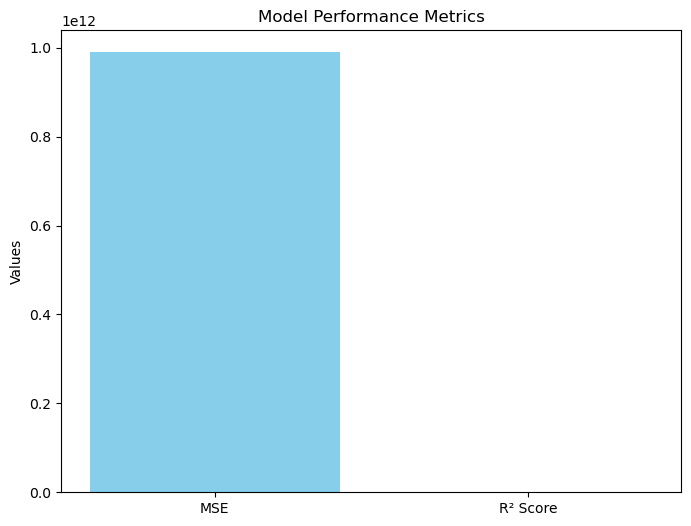

In [175]:
# BAR CHART TO SHOW MSE AND R2 SCORES
plt.figure(figsize=(8,6))
metrics = ['MSE', 'R² Score']
values = [mse, r2]

plt.bar(metrics, values, color=['skyblue', 'salmon'])
plt.title('Model Performance Metrics')
plt.ylabel('Values')
plt.show()

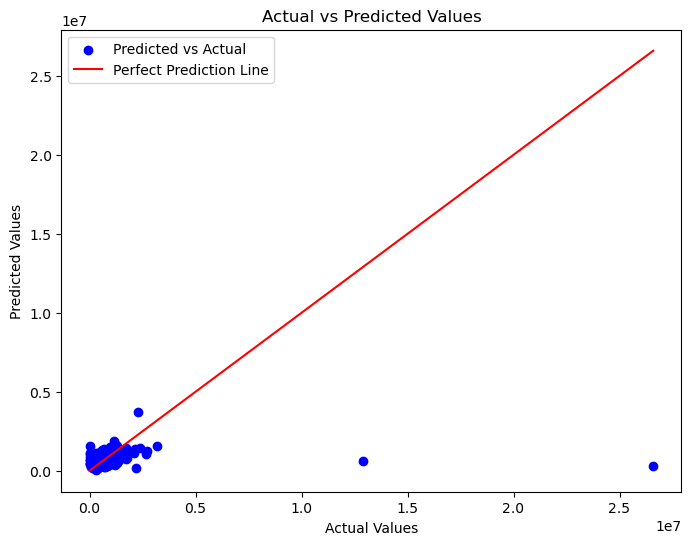

In [176]:
#PLOT ACTUAL VS. PREDICTED VALUES
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.legend()
plt.show()

5. CROSS VALIDATION

In [149]:
#CROSS VALIDATION TO EVALUATE MODEL PERFORMANCE
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

#DISPLAYING THE CROSS VALIDATION MEAN SQUARED ERROR
print(f'Cross-Validated Mean Squared Error (MSE): {cv_mse}')

Cross-Validated Mean Squared Error (MSE): 74849890035.89058


6. RESIDUALS ANALYSIS

In [150]:
#RESIDUAL ANALYSIS
residuals = y_test - y_pred

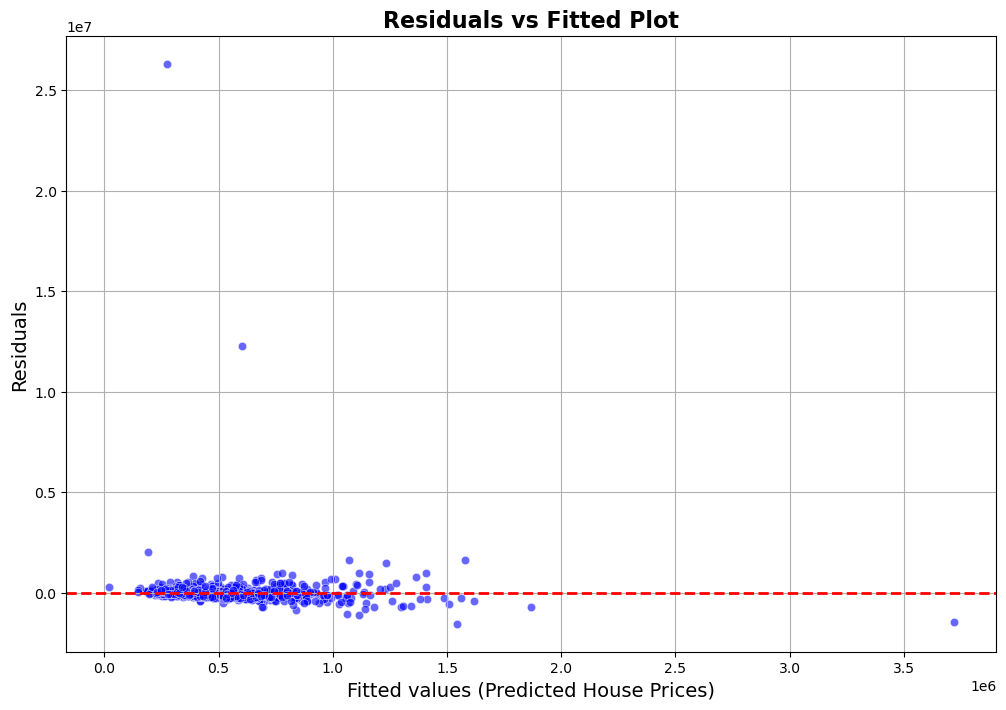

In [178]:
#PLOTTING RESIDUALS
plt.figure(figsize=(12, 8))

#RESIDUALS VS FITTED PLOT WITH ENHANCED AESTHETICS
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.6)

#ADD HORIZONTAL LINE AT 0 TO MARK NO RESIDUALS
plt.axhline(0, color='red', linestyle='--', lw=2)

#ADDING LABELS AND TITLES WITH IMPROVED FONTS
plt.xlabel('Fitted values (Predicted House Prices)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Plot', fontsize=16, fontweight='bold')

#SHOW GRID FOR BETTER VISUALIZATION
plt.grid(True)

#DISPLAY THE PLOT
plt.show()

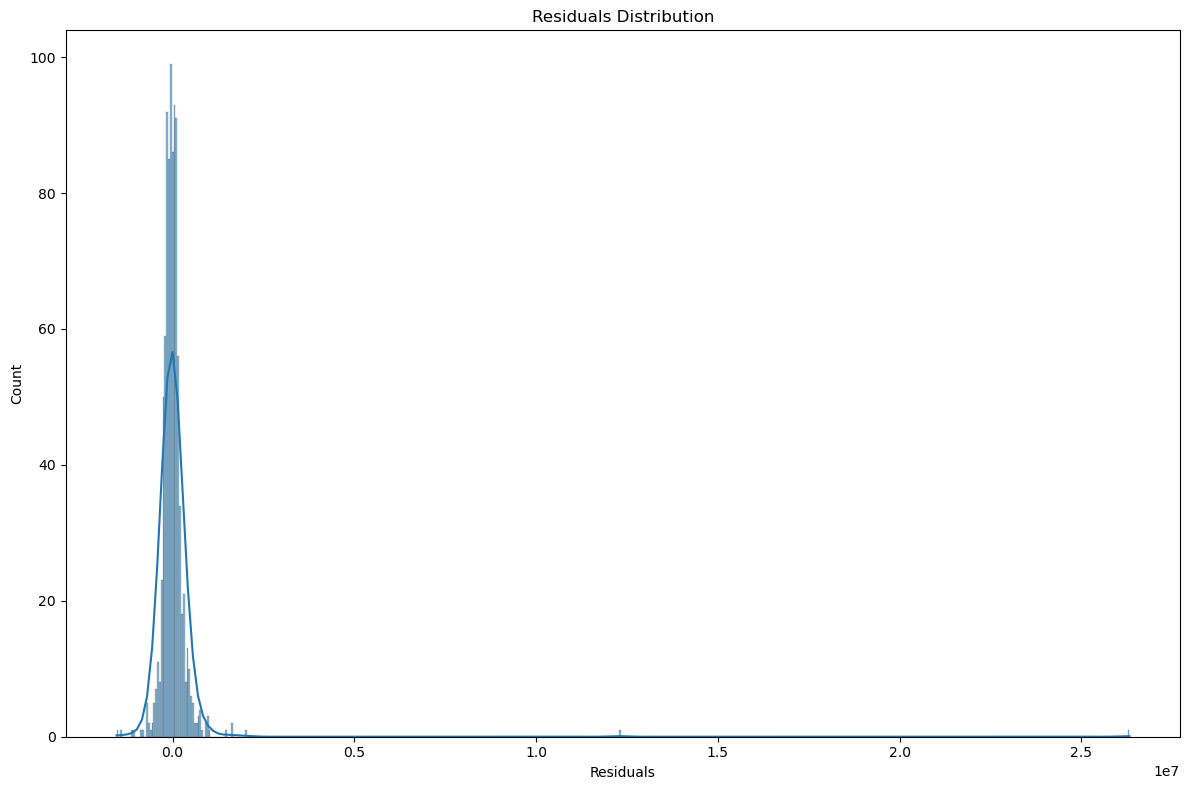

In [152]:
#RESIDUAL DISTRIBUTION PLOT (CHECK FOR NORMALITY)
plt.figure(figsize=(12,8))

sns.histplot(residuals, kde = True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')

plt.tight_layout()
plt.show()

7. MAKING PREDICTIONS

In [177]:
# NEW DATA TO MAKE PREDICTIONS
new_data_array = np.array([[1350, 400, 1340, 600, 1400]])

# MAKING PREDICTIONS USING THE TRAINED MODEL
try:
    # PREDICT WITH THE SINGLE MODEL
    prediction = model.predict(new_data_array)
    
    # OUTPUT THE PREDICTION
    print("Prediction for the new data:")
    print(f"Predicted value: {prediction[0]:.2f}")
except Exception as e:
    # HANDLE ANY ERRORS DURING PREDICTION
    print(f"Error during prediction: {str(e)}")

Prediction for the new data:
Predicted value: -43581313.74


8. CORRELATION

In [125]:
Data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,[num]_encoded
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,NaN
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,NaN
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,NaN
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,NaN
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,NaN
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996,NaN
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,NaN
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,NaN
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,NaN
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426,NaN


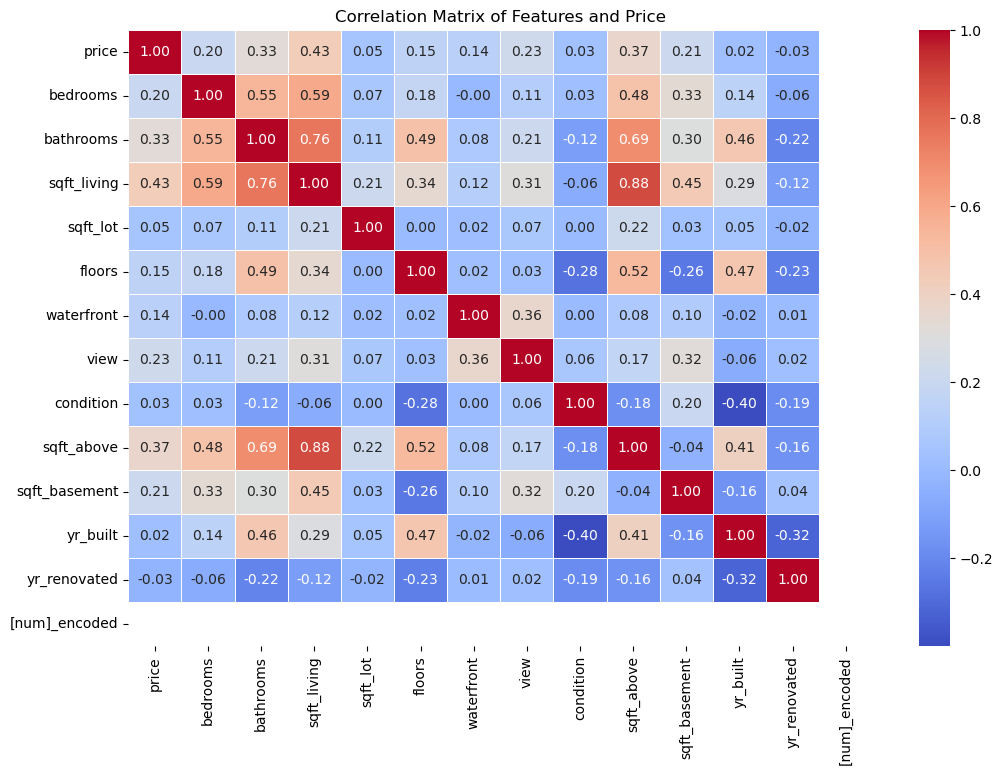

In [131]:
#CORRELATION HEATMAP
plt.figure(figsize =(12,8))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features and Price')

plt.show()

# INTERPRETATION OF THE MODEL:



### FEATURE SCALING:
IMPLEMENTED STANDARD SCALER TO SCALE THE FEATURES BEFORE FEEDING THEM TO THE MODEL.
THIS ESURES THAT FEATURES LIKE SQUARE FOOTAGE, WHICH CAN BE LARGE, DO NOT DOMINATE
MODEL JUST BECAUSE OF THEIR SCALE.

### CROSS VALIDATION: 
SPLITS THE DATA INTO MULTIPLE FOLDS, TRAINS THE MODEL ON EACH FOLD, AND COMPUTE THE 
AVERAGE ERROR.
THIS PROVIDES A MORE RELIABLE ESTIMATE OF MODEL PERFORMANCE, THEREFORE I IMPLEMENTED 
5-FOLD CROSS-VALIDATION.

### RESIDUALS ANALYSIS:
RESIDUAL VS FITTED PLOT __ THIS HELPS CHECK FOR CONSTANT VARIANCE OF RESIDUALS. IDEALLY, 
RESUALS SHOULD BE RANDOMLY SCATTERED AROUND ZERO WITHOUT ANY PATTERN.

RESIDUAL DISTRIBUTION PLOT __ A HISTOGRAM AND KDE PLOT TO CHECK WHETHER THE RESIDUALS FOLLOW 
A NORMAL DISTRIBUTION, A KEY ASSUMPTION FOR LINEAR REGRESSION.

### CORRELATION:
THIS GIVES A VISUAL RePRESENTATION OF THE CORRELATION BETWEEN FEATURES AND THE TARGET VARIABLE(PRICE).
STRONG CORRELATIONS HELP UNDERSTAND WHICH FEATURES MIGHT HAVE THE MOST INFLUENCE ON THE TARGET.

COMPLETE!!!!!!!!!!!!!!!!!!!!!!!